In [1]:
import os

import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

from resnet_9_model import *

## Initialise Data

In [2]:
resize_shape = (48,48)

data_dir = '/home/selimon/Desktop/AI/wdwyl_ros1/src/perception/brand_classification/data/testing'
print(os.listdir(data_dir))

stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

valid_tfms = tt.Compose([
    tt.Resize(resize_shape),
    tt.ToTensor(), 
    tt.Normalize(*stats)
])

# Load dataset & apply transformation
test_ds = ImageFolder(data_dir, valid_tfms)

['lo_bros', '4_pines', 'crown', 'great_northern', 'heineken']


In [3]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_ds.classes[preds[0].item()]

def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Apply softmax to get probabilities
    probs = F.softmax(yb, dim=1)
    # Retrieve the class labels
    classes = test_ds.classes
    # Print probabilities for each class
    for i, prob in enumerate(probs[0]):
        print(f'{classes[i]}: {prob}')
    # Pick index with highest probability as predicted class
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_ds.classes[preds[0].item()]


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

## Initialise Model

In [4]:
device = get_default_device()

# Load the model from a file and move it to the device
model = ResNet9(3, 5).to(device)
model.load_state_dict(torch.load('resnet9_model.pth', map_location=device))
model.eval()  # Set the model to evaluation mode

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

## Run Model

## Testing with Individual Images

4_pines: 0.4046096205711365
crown: 0.1488475799560547
great_northern: 0.1488475799560547
heineken: 0.1488475799560547
lo_bros: 0.1488475799560547


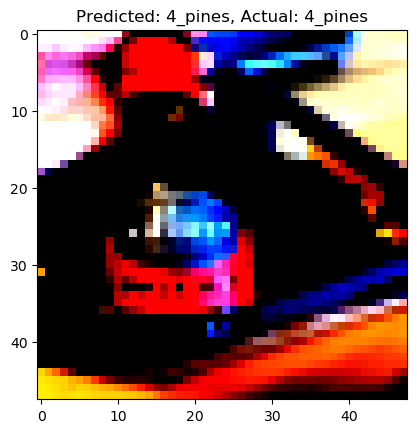

4_pines: 0.15861737728118896
crown: 0.24497991800308228
great_northern: 0.27916792035102844
heineken: 0.15861737728118896
lo_bros: 0.15861737728118896


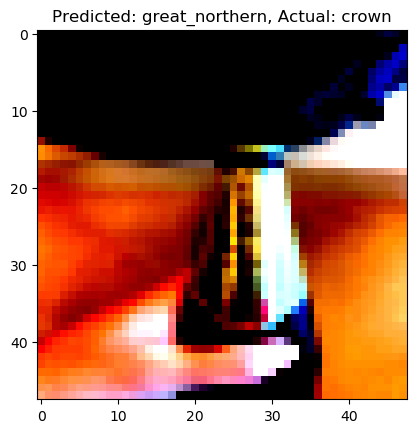

4_pines: 0.14892429113388062
crown: 0.14922519028186798
great_northern: 0.4040018916130066
heineken: 0.14892429113388062
lo_bros: 0.14892429113388062


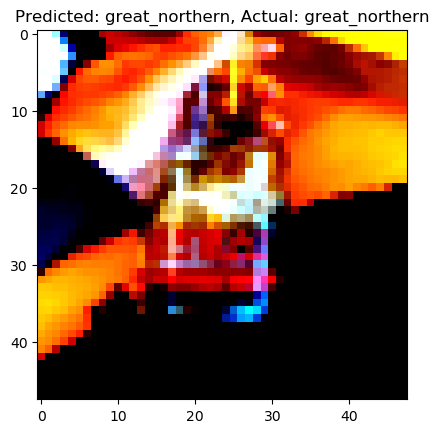

4_pines: 0.1488475799560547
crown: 0.1488475799560547
great_northern: 0.1488475799560547
heineken: 0.4046096205711365
lo_bros: 0.1488475799560547


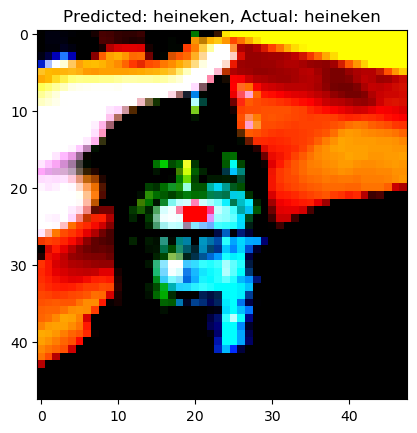

4_pines: 0.14948001503944397
crown: 0.15201960504055023
great_northern: 0.39954042434692383
heineken: 0.1494799554347992
lo_bros: 0.1494799554347992


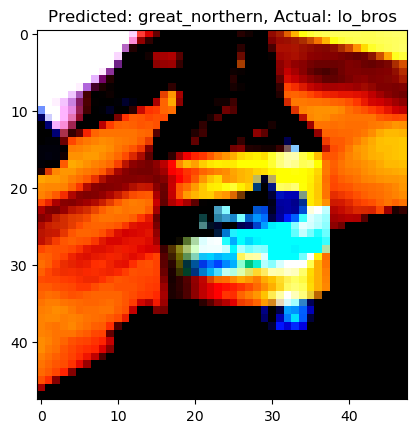

In [5]:
correct_predictions = 0
total_images = len(test_ds)

for i in range(total_images):
    # Get the image and its label from the dataset
    img, label = test_ds[i]
    
    # Make a prediction for the image using the model
    predicted_class = predict_image(img, model)
    
    # Check if the prediction is correct
    if predicted_class == test_ds.classes[label]:
        correct_predictions += 1
    
    # Visualize the image
    plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
    plt.title(f"Predicted: {predicted_class}, Actual: {test_ds.classes[label]}")
    plt.show()


## Accuracy

In [6]:
accuracy = correct_predictions / total_images
print(f"Accuracy on the test dataset: {accuracy:.2%}")

Accuracy on the test dataset: 60.00%
